# Wine Magazine Analysis

An analysis of wines present in Wine Magazine. I'd like to answer the following questions:

1) Are expensive wines worth the price? In other words, when it comes to wine, do you get what you pay for?

2) If so, what do these expensive wines have in common (if anything)? If not, what we can we say about the relationship between price and quality when it comes to wine (diminishing returns?)?

3) Which countries produce which wine varietals? More generally, what does the wine-making landscape look like?

4) Which countries produce the best wines? 

## Getting Familiar with the Data

As a first step, we should get familiar with this data set. For example, we should get a feeling for what the distribution of points looks like. Are points awarded generously, or are the wine reviewers harsh in their evaluations? Does this distribution of points have high variance? 

Similarly, we should get a feeling for how wines are priced. What does the distribution of prices look like? How does it vary depending on the region of the world we're considering? 

In [27]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/winemag-data_first150k.csv')

In [4]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [5]:
countries = set(df['country'].values)
varietals = set(df['variety'].values)

In [30]:
print("Number of countries: " + str(len(countries)))

Number of countries: 49


In [33]:
print("Number of varietals: " + str(len(varietals)))

Number of varietals: 632


In [6]:
df.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


So at a quick glance we see that an "average" bottle of wine costs about \\$24 and has a score of about 88 points. Clearly there is a wide range in prices, with the cheapest wine costing only \\$4 and the most expensive costing $2300. Most wines are affordable though:  75\% of wines cost \\$40 and under. Points, on the other hand, are much more densely packed:  the lowest score is 80 points and the highest score is 100 points.

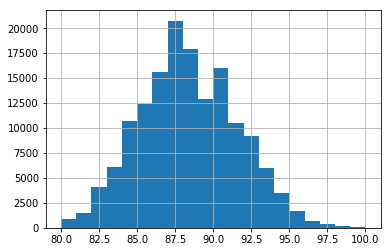

In [8]:
df['points'].hist(bins=20)

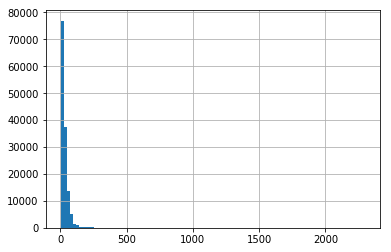

In [9]:
df['price'].hist(bins=100)

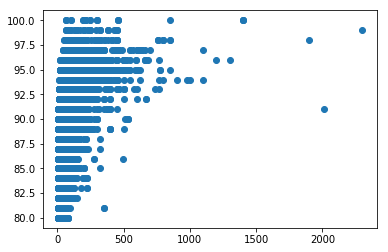

In [10]:
plt.scatter(df['price'], df['points'])

In [11]:
smf.ols('points ~ price', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                 3.680e+04
Date:                Fri, 07 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:45:39   Log-Likelihood:            -3.3898e+05
No. Observations:              137235   AIC:                         6.780e+05
Df Residuals:                  137233   BIC:                         6.780e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.4365      0.010   8269.382      0.000      86.416      86.457
price          0.0408      0.000    191.845      0.000       0.040       0.041
==============================================================================
Omnibus:                    39691.304   Durbin-Watson:                   0.420
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1084362.668
Skew:                          -0.807   Prob(JB):                         0.00
Kurtosis:                      16.676   Cond. No.                         66.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
df_cheap = df.loc[df['price'] <= 100]
df_expensive = df.loc[df['price'] > 100]

In [19]:
smf.ols('points ~ price', data=df_cheap).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                 5.861e+04
Date:                Fri, 07 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:48:02   Log-Likelihood:            -3.1773e+05
No. Observations:              133770   AIC:                         6.355e+05
Df Residuals:                  133768   BIC:                         6.355e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.9664      0.013   6442.577      0.000      84.941      84.992
price          0.0918      0.000    242.103      0.000       0.091       0.093
==============================================================================
Omnibus:                     1180.961   Durbin-Watson:                   0.630
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1212.409
Skew:                          -0.233   Prob(JB):                    5.35e-264
Kurtosis:                       2.990   Cond. No.                         64.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

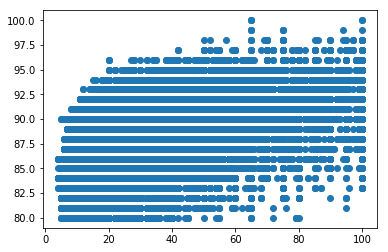

In [20]:
plt.scatter(df_cheap['price'], df_cheap['points'])

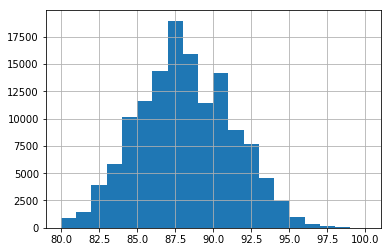

In [21]:
df_cheap['points'].hist(bins=20)

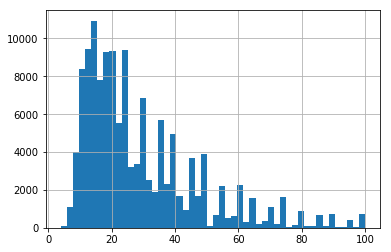

In [22]:
df_cheap['price'].hist(bins=50)

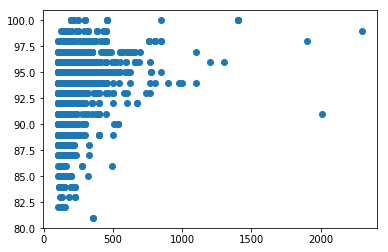

In [23]:
plt.scatter(df_expensive['price'], df_expensive['points'])

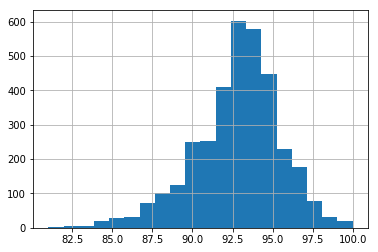

In [24]:
df_expensive['points'].hist(bins=20)

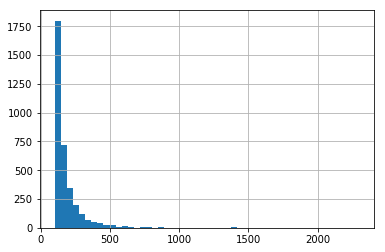

In [25]:
df_expensive['price'].hist(bins=50)

In [26]:
smf.ols('points ~ price', data=df_expensive).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     295.6
Date:                Fri, 07 Jun 2019   Prob (F-statistic):           1.23e-63
Time:                        20:49:52   Log-Likelihood:                -8419.3
No. Observations:                3465   AIC:                         1.684e+04
Df Residuals:                    3463   BIC:                         1.685e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     91.7648      0.082   1122.217      0.000      91.605      91.925
price          0.0063      0.000     17.193      0.000       0.006       0.007
==============================================================================
Omnibus:                      338.723   Durbin-Watson:                   1.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              515.887
Skew:                          -0.731   Prob(JB):                    9.47e-113
Kurtosis:                       4.198   Cond. No.                         388.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
wines_by_country = {}
for r in rows[1:]:
    country = r[1]
    if country in wines_by_country:
        wines_by_country[country].append(r)
    else:
        wines_by_country[country] = [r]

In [14]:
from collections import Counter

varietal_counts_by_country = {}
varietal_percentages_by_country = {}
for country in wines_by_country.keys():
    varietals = [e[9] for e in wines_by_country[country]]
    
    counts = dict(Counter(varietals))
    varietal_counts_by_country[country] = counts
    
    total_count = sum(counts.values())
    varietal_percentages_by_country[country] = {v: float(c) / total_count for v, c in counts.items()}
    

In [18]:
def jaccard(d1, d2):
    d1_varietals, d2_varietals = d1.keys(), d2.keys()
    intersection = set(d1_varietals).intersection(set(d2_varietals))
    union = set(d1_varietals).union(set(d2_varietals))
    
    if len(intersection) == 0 or len(union) == 0:
        return 0.0
    
    return len(intersection) / len(union)


In [26]:
countries = list(wines_by_country.keys())
print(countries)

['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria', 'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa', 'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada', 'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', '', 'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay', 'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil', 'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine', 'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg', 'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France']


In [31]:
jaccard_sims = {}
for c in countries:
    jaccard_sims[c] = {}
    for other_c in countries:
        if other_c == c:
            jaccard_sims[c][other_c] = 1.0 # Or maybe 1.0?
            continue
        jaccard_sims[c][other_c] = jaccard(varietal_counts_by_country[c], varietal_counts_by_country[other_c])    

In [41]:
jaccard_mat = []
for c in countries:
    scores = []
    for other_c in countries:
        scores.append(10*jaccard_sims[c][other_c])
    jaccard_mat.append(scores)

jaccard_mat = np.array(jaccard_mat)

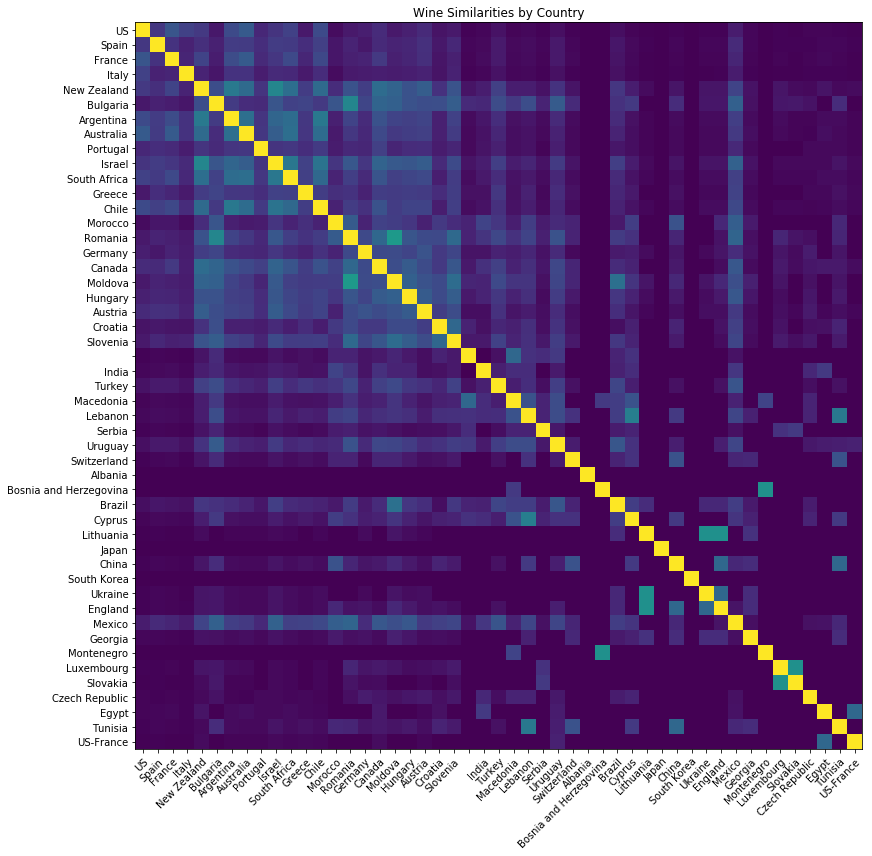

In [46]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [18, 12]

fig, ax = plt.subplots()
im = ax.imshow(jaccard_mat)

ax.set_xticks(np.arange(len(countries)))
ax.set_yticks(np.arange(len(countries)))

ax.set_xticklabels(countries)
ax.set_yticklabels(countries)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("Wine Similarities by Country")
fig.tight_layout()
plt.show()

# Comparing Wine Descriptions

In [48]:
from gensim.models import FastText

In [ ]:
model = FastText.load_fasttext_format('./wiki/wiki.en.bin')